### Linear Regression Analysis (Identity)

In [1]:
# Linear Regression Example
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from FFNN_class import *

np.random.seed(2024)

import autograd.numpy as np
from sklearn.model_selection import train_test_split

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
output_nodes = 1

linear_regression = FFNN((input_nodes, output_nodes), output_func=identity, cost_func=CostOLS, seed=2023)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler, epochs=500)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=500)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Skranke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Constant: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 2.91  Constant: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 2.91  
Output Skranke Function:
OLS MSE:	7.800420720056626e-30
Ridge MSE:	2.3073444031039592e-08
FFNN MSE:	2.7122725734665996


In [2]:
# Linear Regression Franke Function
import autograd.numpy as np
from sklearn.model_selection import train_test_split

# Franke function
np.random.seed(2024)
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=5
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
output_nodes = 1

linear_regression = FFNN((input_nodes, output_nodes), output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=5000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Franke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Constant: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.320 Constant: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0322  
Output Franke Function:
OLS MSE:	0.0026093433625198996
Ridge MSE:	0.0035740018146377716
FFNN MSE:	0.04193178879572511


### Linear Regression Analysis (Sigmoid)

In [3]:
# Linear Regression Example
np.random.seed(2024)

import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 500
hidden_nodes2 = 250
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
# scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=5000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Skranke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.734 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.311  
Output Skranke Function:
OLS MSE:	7.800420720056626e-30
Ridge MSE:	2.3073444031039592e-08
FFNN MSE:	0.5118881779724713


In [4]:
# Linear Regression Franke Function
import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(2024)

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=5
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 500
hidden_nodes2 = 250
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
# scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=5000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Franke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Adam: Eta=0.001, Lambda=0


  [=======================================>] 100.0% | train_error: 0.876 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.186   
Output Franke Function:
OLS MSE:	0.0026093433625198996
Ridge MSE:	0.0035740018146377716
FFNN MSE:	0.3396722818637746


### Linear Regression Analysis (ReLu)

In [5]:
# Linear Regression Example
np.random.seed(2024)

import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 500
hidden_nodes2 = 500
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=RELU, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=1000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Skranke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Constant: Eta=0.001, Lambda=0
  [----------------------------------------] 1.000% | train_error: 1848920880030883473331057427760313351403776863682104005395542259616286574261413093995837284120885014469844171587845761319083393896948665849902381906175765024595176345479424715490041903710208 

RuntimeWarning: overflow encountered in matmul

In [7]:
# Linear Regression Franke Function
import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(2024)

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=5
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 300
hidden_nodes2 = 300
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=RELU, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=2000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Franke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Constant: Eta=0.001, Lambda=0
  [----------------------------------------] 1.000% | train_error: 720201790321532322590640191051012010367869765238006496714900891975962597434648827457332128320663289043413246090625974752002716480032713992441962104043689939576735365476563715405256580631247409588484047450718191636289797557846016 

RuntimeWarning: overflow encountered in matmul

### Classification

In [1]:
# Binary classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from FFNN_class import *

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

X_train, X_val, t_train, t_val = train_test_split(X, target)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

input_nodes = X_train.shape[1]
output_nodes = 1

logistic_regression = FFNN((input_nodes, output_nodes), output_func=sigmoid, cost_func=CostLogReg, seed=2023)

logistic_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
scores = logistic_regression.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

input_nodes = X_train.shape[1]
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

neural_network = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)

neural_network.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-4, rho=0.9, rho2=0.999)
scores = neural_network.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 2.77 | train_acc: 0.866 | val_error: 4.35 | val_acc: 0.790  Adam: Eta=0.0001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0486 | train_acc: 0.998 | val_error: 1.30 | val_acc: 0.937 

In [2]:
wisconsin.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

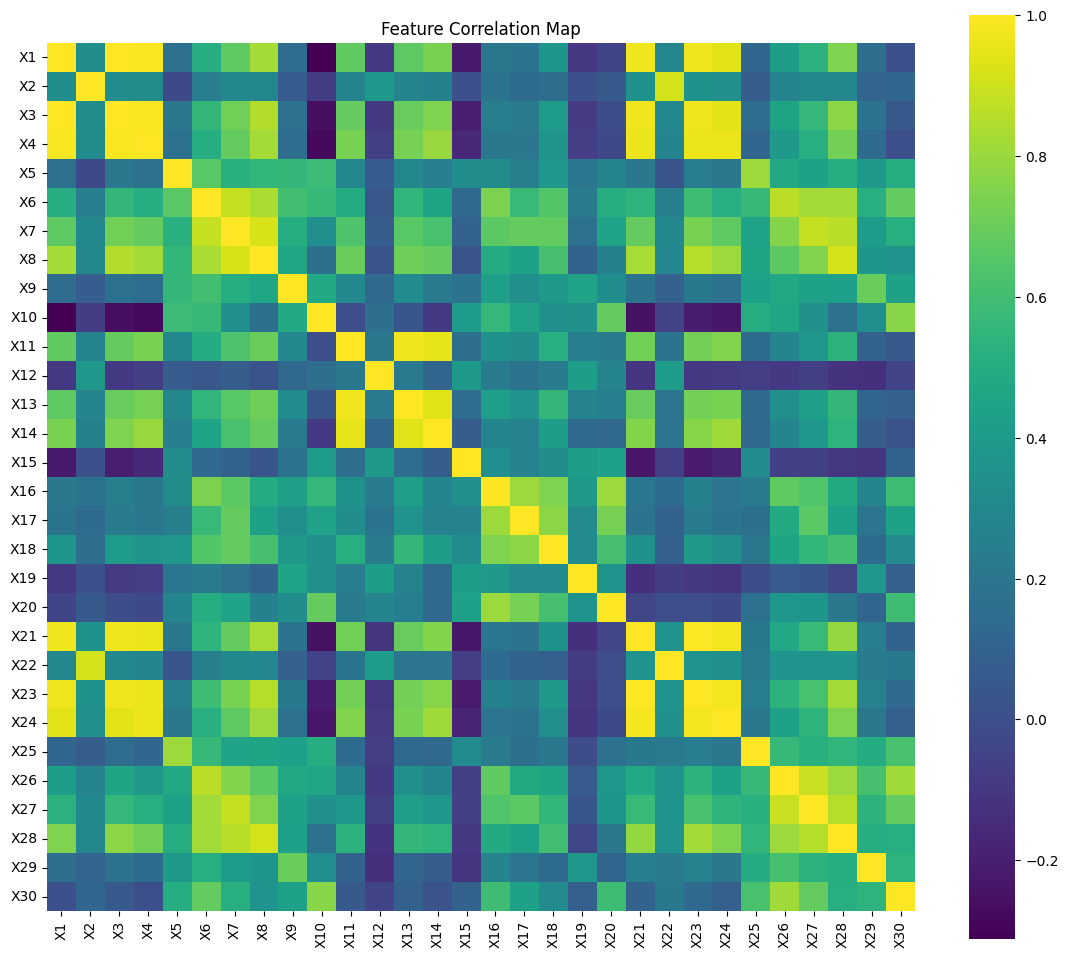

In [10]:
# %matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.DataFrame(X, columns=wisconsin.feature_names)
df.columns = [f"X{i+1}" for i in range(df.shape[1])]

correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="viridis", square=True)
plt.title("Feature Correlation Map")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

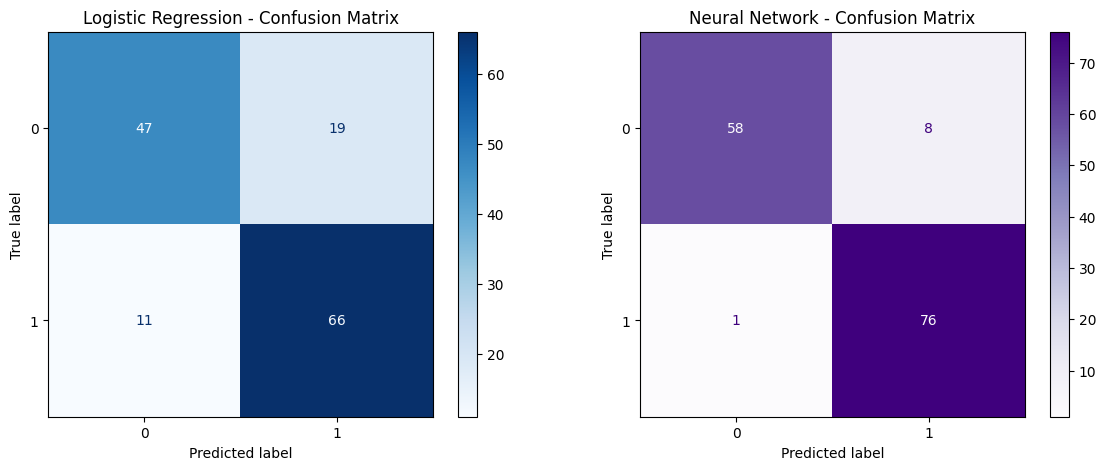

Logistic Regression Accuracy:	0.79
Neural Network Accuracy:	0.94


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

log_reg_preds = logistic_regression.predict(X_val).round()
nn_preds = neural_network.predict(X_val).round()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cm_log_reg = confusion_matrix(t_val, log_reg_preds)
ConfusionMatrixDisplay(cm_log_reg).plot(ax=ax[0], cmap="Blues")
ax[0].set_title("Logistic Regression - Confusion Matrix")

cm_nn = confusion_matrix(t_val, nn_preds)
ConfusionMatrixDisplay(cm_nn).plot(ax=ax[1], cmap="Purples")
ax[1].set_title("Neural Network - Confusion Matrix")

plt.show()

print(f"Logistic Regression Accuracy:\t{accuracy_score(t_val, log_reg_preds):.2f}")
print(f"Neural Network Accuracy:\t{accuracy_score(t_val, nn_preds):.2f}")


In [12]:
# Multiclass classification
from sklearn.datasets import load_digits

def onehot(target: np.ndarray):
    onehot = np.zeros((target.size, target.max() + 1))
    onehot[np.arange(target.size), target] = 1
    return onehot

digits = load_digits()

X = digits.data
target = digits.target
target = onehot(target)

input_nodes = 64
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 10

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

multiclass = FFNN(dims, hidden_func=LRELU, output_func=softmax, cost_func=CostCrossEntropy)

multiclass.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-4, rho=0.9, rho2=0.999)
scores = multiclass.fit(X, target, scheduler, epochs=1000)

Adam: Eta=0.0001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.157 | train_acc: 0.985 